# Identification of a Neural-Network for Constitutive Law

## Preliminary part - Introduction

To allow inline pictures, run the following block

Import all the useful libraries before first run
We need here the classic ones such as:
- math
- numpy
- pandas
- matplotlib

And for the Neural Network, we also need to import parts of the keras module of TensorFlow

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Global definitions**

Here after, we define the colors to use for plotting.

In [2]:
saveFigures = True
colorlist = ['#bb0000', '#00bb00', "#0000bb", '#bbbb00', '#bb00bb', "#00bbbb", '#bbbbbb', '#770000', '#007700', "#000077", '#777700', '#770077', "#007777", '#777777', '#440000', '#004400', "#000044", '#444400', '#440044', "#0044444", '#444444','#000000']

Useful functions to define the number of subplots to use

In [3]:
baseSize = (8,6) # Base size of a subplot

def sbPlot(n):
    if (n == 1): return 1, 1
    if (n <= 2): return 1, 2
    if (n <= 4): return 2, 2
    if (n <= 6): return 3, 2
    if (n <= 9): return 3, 3
    if (n <=12): return 4, 3
    return 0,0

def sbPlotSize(n):
    x, y = sbPlot(n)
    return baseSize[0]*y, baseSize[1]*x

Used to plot an Histogram

In [4]:
def getDigitsFrom(n):
    d = int(math.log10(abs(n)))
    return n*10**(-d + 1), d - 1

def plotHisto(Y, labels, bottom, top, xlab, ylab, figname, title):
    numb = len(Y)
    X = np.arange(numb) +1

    plt.figure(figsize = (12, 9)) # for a4 landscape
    plt.rc('text', usetex=True)
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16

    plt.bar(X, Y, color = '#555555')

    for x, y in zip(X, Y):
        u,v = getDigitsFrom(y)
        plt.text(x, y + 0.01*(top-bottom), '$%.2f \\times 10^{%d}$' % (u,v), ha='center', va='bottom', fontsize=16)

    for i in range(0,numb):
        if (Y[i]> 0.3*top):
            plt.text(X[i], (top-bottom)/10 + bottom , labels[i], ha='center', va='bottom', fontsize=22, rotation=90, color='white')
        else:
            plt.text(X[i], 4*(top-bottom)/10 + bottom , labels[i], ha='center', va='bottom', fontsize=22, rotation=90, color='black')

    plt.ylim(bottom, top)

    plt.ylabel(ylab, fontsize = 20)
    plt.xlabel(xlab, fontsize = 20)
    plt.title(title, fontsize = 20)

    plt.tick_params(axis='x',top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
    plt.grid(axis='y')
    if (saveFigures) : plt.savefig(figname, bbox_inches = 'tight', pad_inches = 0)
    else: plt.show()

## Definition of the data file to use 
We define here after the directory and the Excel Datafile used for the Neural-Network construction.

In [5]:
dataPath = '.'

Load the Convergence database

In [6]:
names = ['3-5-1-tanh', '3-5-1-sigmoid','3-5-3-1-tanh', '3-5-3-1-sigmoid']
names = ['3-11-1-sigmoid','3-11-5-1-sigmoid','3-13-1-sigmoid','3-9-1-sigmoid','3-9-5-1-sigmoid','3-11-1-tanh','3-11-5-1-tanh','3-13-1-tanh','3-9-1-tanh','3-9-5-1-tanh']
names = ['3-15-1-tanh','3-15-1-sigmoid','3-15-7-1-tanh','3-15-7-1-sigmoid']
names = ['3-7-4-1-tanh','3-13-1-tanh','3-15-1-tanh','3-13-1-sigmoid','3-15-1-sigmoid','3-13-7-1-tanh','3-15-7-1-tanh','3-7-4-1-sigmoid','3-13-7-1-sigmoid','3-15-7-1-sigmoid']
names = ['3-7-4-1-tanh','3-15-1-tanh','3-15-7-1-tanh','3-15-1-sigmoid','3-7-4-1-sigmoid','3-15-7-1-sigmoid']
convergenceDatas = []   # To store convergence curves
for name in names:
    NN = np.load(dataPath + '/CD-' + name + '.npz')
    cc = [name, NN['convCurve']]
    convergenceDatas.append(cc)

## Plot results of the optimization procedure

First, we plot the convergence curves

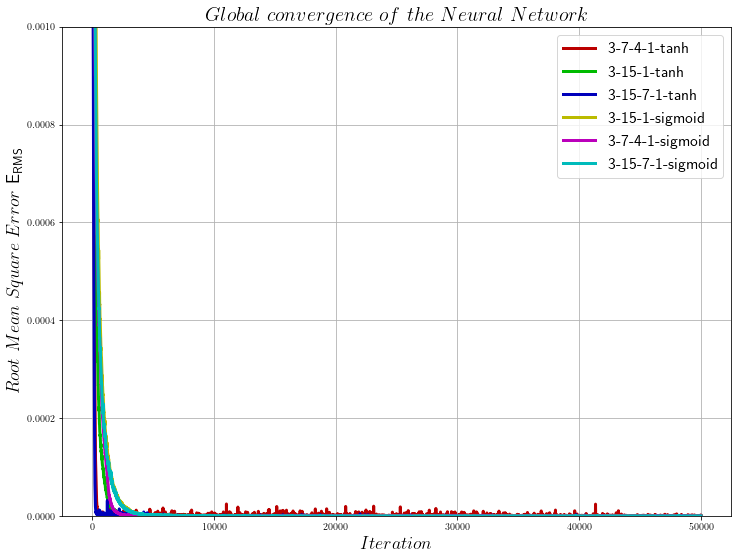

In [7]:
plt.figure(figsize = (12, 9))
plt.rc('text', usetex = True)
plt.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
cl = 0
for convergenceData in convergenceDatas:
    name = convergenceData[0]
    curve = convergenceData[1]
    shortCurve = curve[::10]
    x = np.linspace(0, len(curve), len(shortCurve))
    plt.plot(x, shortCurve, label = name, color=colorlist[cl], linewidth = 3)
    cl += 1
plt.grid()
plt.xlabel(r'$Iteration$', fontsize = 18)
plt.ylim(0, 1e-3)
plt.ylabel(r'$Root\ Mean\ Square\ Error\ \text{E}_\text{RMS}$', fontsize = 18)
plt.title(r'$Global\ convergence\ of\ the\ Neural\ Network$', fontsize = 20)
plt.legend(loc = 'upper right',fancybox = True, numpoints = 1, fontsize = 16)
if (saveFigures) : plt.savefig(dataPath + '/' + 'Convergence.svg', bbox_inches = 'tight', pad_inches = 0)
else: plt.show()

The we plot the history of all models precision

<Figure size 864x648 with 0 Axes>

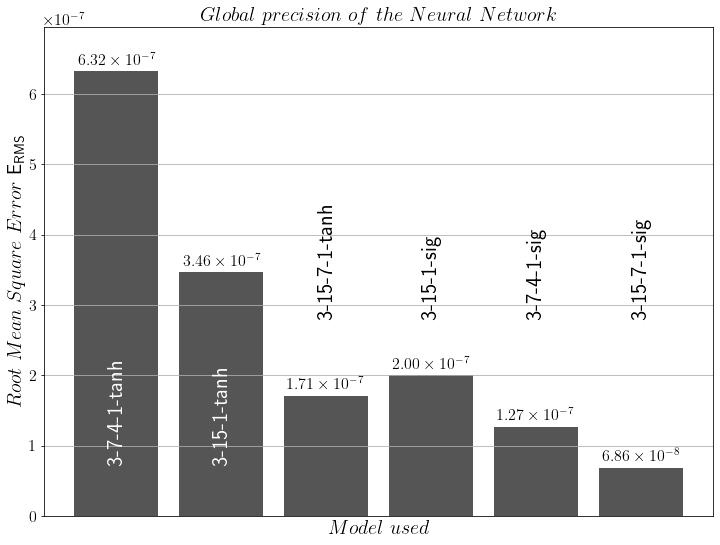

In [8]:
plt.figure(figsize = (12, 9))
plt.rc('text', usetex = True)
plt.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
convs = np.array([])
labels = []
for convergenceData in convergenceDatas:
    name = convergenceData[0]
    curve = convergenceData[1]
    lastzone = int(len(curve)/20) # 5% des points pris en compte pour la convergence globale
    convs = np.append(convs, curve[-lastzone:].mean())
    labels.append(name.replace('sigmoid','sig'))
bottom = 0
top = convs.max()*1.1
ylab = r'$Root\ Mean\ Square\ Error\ \text{E}_\text{RMS}$'
xlab = r'$Model\ used$'
figname = dataPath + '/' + 'Precision.svg'
title = r'$Global\ precision\ of\ the\ Neural\ Network$'
plotHisto(convs, labels, bottom, top, xlab, ylab, figname, title)

Plots the results of the model where all subplots are dependents on the plastic strain rate $\dot{\overline{\varepsilon}^p}$